In [111]:
import pandas as pd
import numpy as np

In [126]:
num_rows_to_read = 810 

covidence = pd.read_excel('Copy of Survey-covidence based-13-5-24 - Colored.xlsx', sheet_name='All - covidence', nrows=num_rows_to_read)
print(covidence.columns)

Index(['Title', 'Authors', 'Published Year', 'Published Month', 'Journal',
       'Volume', 'Issue', 'Pages', 'Accession Number', 'DOI', 'Ref',
       'Covidence #', 'Study', 'Abstract', 'reject', 'Neuro', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'N', 'age', 'Unnamed: 21', 'Maths',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Psychology',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'notes', 'Unnamed: 31'],
      dtype='object')


In [113]:
print(covidence[covidence['Published Year'].isna()])

Empty DataFrame
Columns: [Title, Authors, Published Year, Published Month, Journal, Volume, Issue, Pages, Accession Number, DOI, Ref, Covidence #, Study, Abstract, reject, Neuro, Unnamed: 16, Unnamed: 17, Unnamed: 18, N, age, Unnamed: 21, Maths, Unnamed: 23, Unnamed: 24, Unnamed: 25, Psychology, Unnamed: 27, Unnamed: 28, Unnamed: 29, notes, Unnamed: 31]
Index: []

[0 rows x 32 columns]


In [114]:
covidence['Published Year'] = covidence['Published Year'].astype(int).astype(str)
covidence['Published Date'] = covidence['Published Year'].astype(str) + '/' + covidence['Published Month'].astype(str)
print(covidence['Published Date'])

0      2023/01/28/
1        2015/09//
2      2023/01/01/
3      2016/01/01/
4      2013/04/17/
          ...     
804    2013/01/02/
805      2016/08//
806      2016/08//
807    2018/04/24/
808    2018/06/01/
Name: Published Date, Length: 809, dtype: object


In [115]:
articles_per_year = covidence['Published Year'].value_counts()
print(articles_per_year)

Published Year
2023    66
2020    61
2019    61
2016    60
2021    58
2018    54
2022    53
2015    48
2014    46
2010    37
2013    36
2011    35
2017    34
2012    33
2009    28
2008    14
2007    12
2006    10
2004    10
2024    10
2005     8
2003     6
2001     4
2002     3
1992     3
1995     3
1996     2
1990     2
1991     2
1987     2
1997     2
2000     2
1980     1
1986     1
1972     1
1975     1
Name: count, dtype: int64


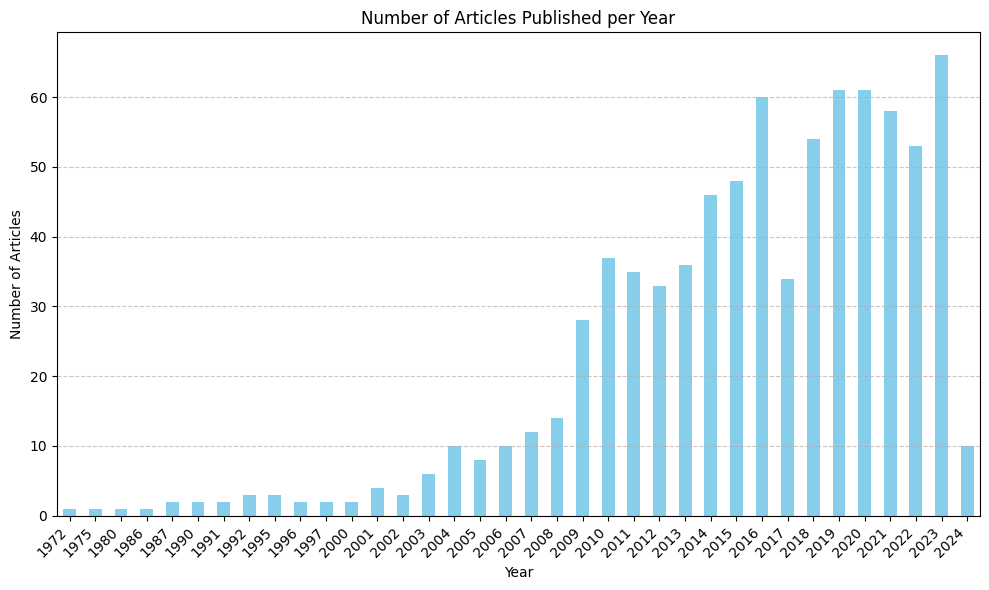

In [116]:
import matplotlib.pyplot as plt

# Assuming 'covidence' is your DataFrame
# Assuming 'Published Year' is the column containing the publication years

# Calculate the number of articles published per year
articles_per_year = covidence['Published Year'].value_counts()

# Sort the series by index (year)
articles_per_year_sorted = articles_per_year.sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
articles_per_year_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of Articles Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [117]:
import pandas as pd

# Assuming 'covidence' is your DataFrame
# Find the index of the 'Neuro' column
neuro_index = covidence.columns.get_loc('Neuro')

# Initialize an empty DataFrame to store concatenated values
concatenated_df = pd.DataFrame()

# Iterate over every two consecutive columns after the 'Neuro' column
for i in range(neuro_index + 1, len(covidence.columns) - 1, 2):
    # Check if there are enough columns for concatenation
    if i + 1 < len(covidence.columns):
        # Concatenate the 'Neuro' column with the two consecutive columns
        concatenated_df[f'Concatenated_Neuro_{i}_{i+1}'] = covidence['Neuro'].astype(str) + ' ' + covidence.iloc[:, i].astype(str) + ' ' + covidence.iloc[:, i+1].astype(str)

# Print the new DataFrame with concatenated columns
print(concatenated_df)



                       Concatenated_Neuro_16_17  \
0                                   EEG ERD nan   
1                 fMRI; neurocognition fMRI nan   
2                                   nan nan nan   
3                  fMRI; neurocognition nan nan   
4                  EEG, neurocognition iEEG nan   
..                                          ...   
804                fMRI; neurocognition nan nan   
805  neurocognition; neuroimaging;;     nan nan   
806   neurocognition; neuroimaging;;    nan nan   
807                                 nan nan nan   
808                 neurocognition;     nan nan   

                       Concatenated_Neuro_18_19  \
0                                   EEG nan 118   
1                  fMRI; neurocognition nan nan   
2                                   nan nan nan   
3                  fMRI; neurocognition nan nan   
4                   EEG, neurocognition nan nan   
..                                          ...   
804                fMRI; neuro

In [130]:
import pandas as pd

# Assuming 'covidence' is your DataFrame
# Find the index of the 'Neuro' column
neuro = covidence[[ 'Neuro','Unnamed: 16', 'Unnamed: 17']]
concatenated_df = pd.DataFrame()

concatenated_df['Neuro_concatenated'] = covidence['Neuro'].astype(str) + ' '+covidence['Unnamed: 16'].astype(str) + ' '+covidence['Unnamed: 17'].astype(str)

print(concatenated_df['Neuro_concatenated'])

0                                     EEG ERD nan
1                   fMRI; neurocognition fMRI nan
2                                     nan nan nan
3                    fMRI; neurocognition nan nan
4                    EEG, neurocognition iEEG nan
                          ...                    
804                  fMRI; neurocognition nan nan
805    neurocognition; neuroimaging;;     nan nan
806     neurocognition; neuroimaging;;    nan nan
807                                   nan nan nan
808                   neurocognition;     nan nan
Name: Neuro_concatenated, Length: 809, dtype: object


In [145]:
# Assuming 'covidence' is your DataFrame
# Define the terms to search for
search_terms = ['EEG', 'fMRI', 'eye tracking', 'GSR']

# Initialize counts for each term
term_counts = {term: 0 for term in search_terms}

# Iterate over the 'Neuro' column
for neuro_article in concatenated_df['Neuro_concatenated']:
    # Check if any of the search terms are present in the article
    for term in search_terms:
        if term.lower() in str(neuro_article).lower():
            term_counts[term] += 1
# Print the counts for each term
for term, count in term_counts.items():
    print(f"Number of articles dealing with {term}: {count}")

Number of articles dealing with EEG: 95
Number of articles dealing with fMRI: 189
Number of articles dealing with eye tracking: 104
Number of articles dealing with GSR: 3


In [159]:
search_terms = ['EEG', 'fMRI', 'eye tracking', 'GSR']

s = concatenated_df['Neuro_concatenated'].str.lower()

term_counts = {term: 0 for term in search_terms}
for term in search_terms:
    print(f" {term}: {s[s.str.contains(term.lower())].count()}")
    term_counts[term] = s[s.str.contains(term.lower())].count()

# print(f" EEG: {s[s.str.contains('eeg')].count()}")
# print(f" fMRI: {s[s.str.contains('fmri')].count()}")
# print(f" eye tracking: {s[s.str.contains('eye tracking')].count()}")
# print(f" GSR: {s[s.str.contains('gsr')].count()}")


 EEG: 95
 fMRI: 189
 eye tracking: 104
 GSR: 3


 EEG: 95
 fMRI: 189
 eye tracking: 104
 GSR: 3


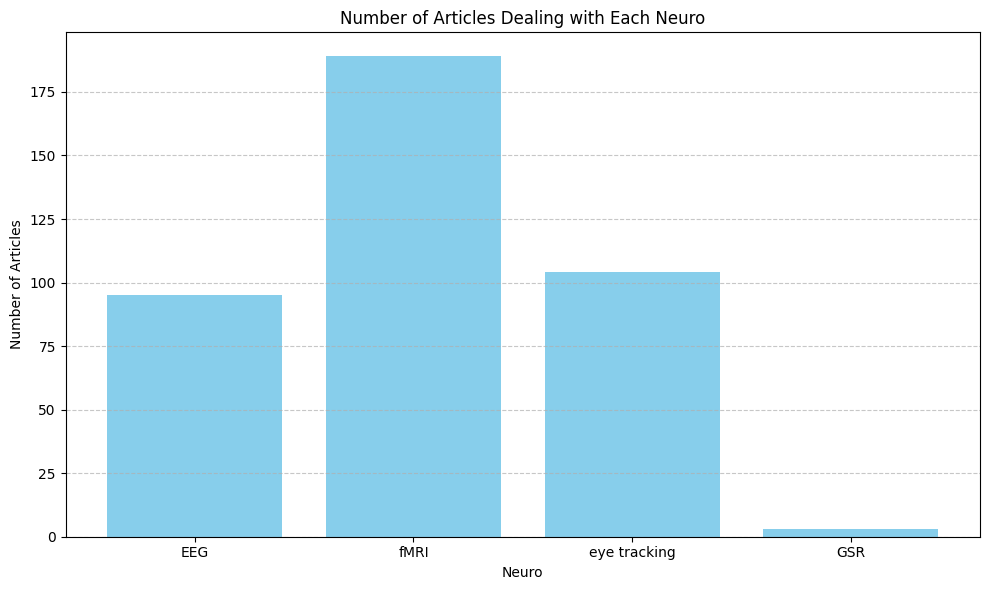

In [160]:
import matplotlib.pyplot as plt

search_terms = ['EEG', 'fMRI', 'eye tracking', 'GSR']

s = concatenated_df['Neuro_concatenated'].str.lower()

term_counts = {term: 0 for term in search_terms}
for term in search_terms:
    print(f" {term}: {s[s.str.contains(term.lower())].count()}")
    term_counts[term] = s[s.str.contains(term.lower())].count()
    
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(term_counts.keys(), term_counts.values(), color='skyblue')
plt.title('Number of Articles Dealing with Each Neuro')
plt.xlabel('Neuro')
plt.ylabel('Number of Articles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


      EEG  fMRI  eye tracking  GSR
1972    0     0             0    0
1975    0     0             0    0
1980    0     0             0    0
1986    0     0             0    0
1987    0     0             0    0
1990    0     0             0    0
1991    0     0             0    0
1992    0     0             1    0
1995    0     0             1    0
1996    0     0             0    0
1997    0     0             0    0
2000    1     1             0    0
2001    0     3             0    0
2002    0     0             0    0
2003    1     2             0    0
2004    1     3             0    0
2005    1     4             0    0
2006    1     5             0    0
2007    0     1             0    0
2008    0     5             1    0
2009    3     9             3    0
2010    4    15             0    0
2011    2    14             1    0
2012    2    16             0    0
2013    5     7             4    0
2014    4     9             5    0
2015   11     8             6    0
2016    6     9     

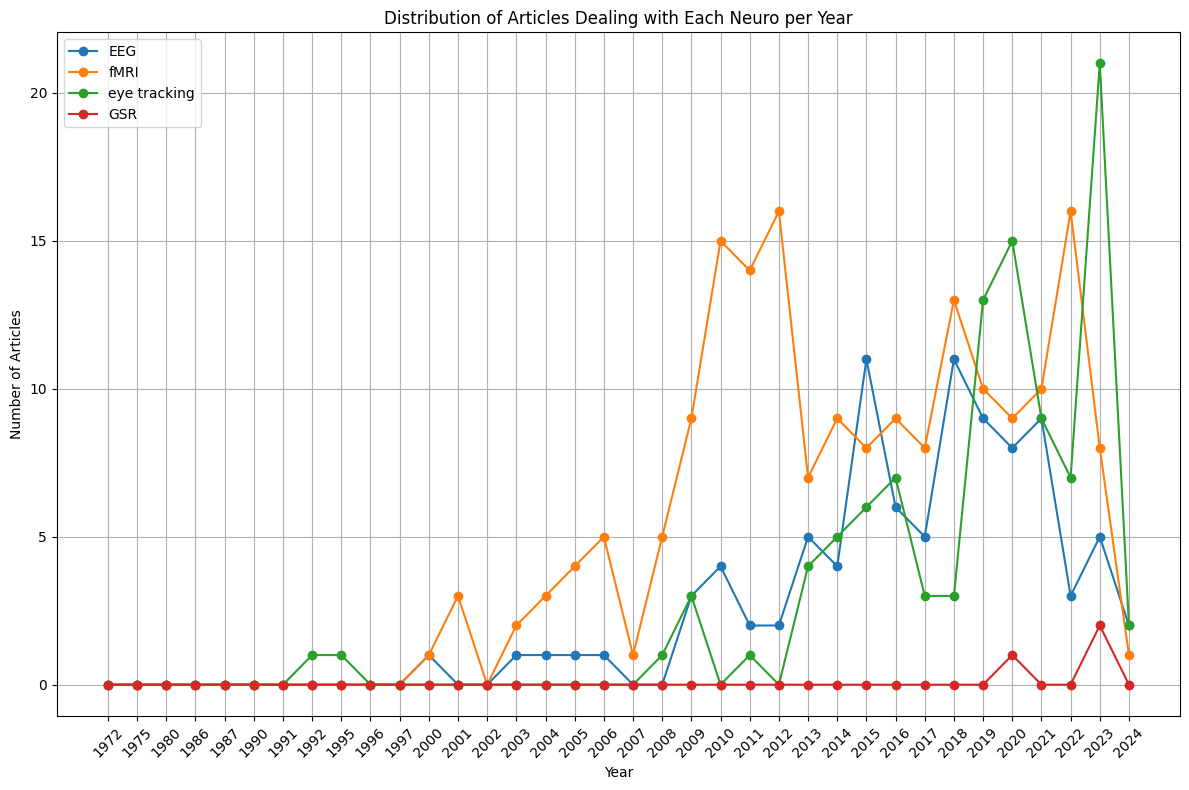

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'covidence' is your DataFrame
# Define the terms to search for
search_terms = ['EEG', 'fMRI', 'eye tracking', 'GSR']

# Initialize a DataFrame to store counts for each term per year
years = covidence['Published Year'].unique()
term_counts_per_year = pd.DataFrame(0, index=years, columns=search_terms)

# Iterate over the DataFrame to count occurrences of each term per year
for index, row in covidence.iterrows():
    year = row['Published Year']
    neuro_article = row['Neuro']
    if pd.notna(neuro_article):  # Ensure neuro_article is not NaN
        for term in search_terms:
            if term.lower() in str(neuro_article).lower():
                term_counts_per_year.loc[year, term] += 1

# Sort the DataFrame by year
term_counts_per_year.sort_index(inplace=True)

# Print the counts for each term per year
print(term_counts_per_year)

# Plot the data
plt.figure(figsize=(12, 8))
for term in search_terms:
    plt.plot(term_counts_per_year.index, term_counts_per_year[term], marker='o', label=term)

plt.title('Distribution of Articles Dealing with Each Neuro per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [121]:
import pandas as pd

# Assuming 'covidence' is your DataFrame
# Count the number of articles published in each journal
articles_per_journal = covidence['Journal'].value_counts()

# Filter the counts to find journals with only one article
journals_with_one_article = articles_per_journal[articles_per_journal == 1]
journals_with_two_article = articles_per_journal[articles_per_journal == 2]

# Count the number of journals with only one article
num_journals_with_one_article = len(journals_with_one_article)
num_journals_with_two_article = len(journals_with_two_article)


# Print the result
print(f"Number of journals with only one article: {num_journals_with_one_article}")
print(f"Number of journals with only two article: {num_journals_with_two_article}")


Number of journals with only one article: 219
Number of journals with only two article: 53


Journal
Neuropsychologia                        37
NeuroImage                              32
Frontiers in Human Neuroscience         19
Frontiers in Psychology                 19
ZDM - Mathematics Education             18
Developmental Science                   16
Developmental Cognitive Neuroscience    14
Journal of Cognitive Neuroscience       12
Trends in Neuroscience and Education    10
PLoS ONE                                10
Educational Studies in Mathematics       9
Human Brain Mapping                      9
Cerebral Cortex                          8
Scientific reports                       7
Frontiers in Education                   7
Journal of Numerical Cognition           7
Mind, Brain, and Education               6
Developmental science                    6
Psychophysiology                         6
PloS one                                 6
Name: count, dtype: int64


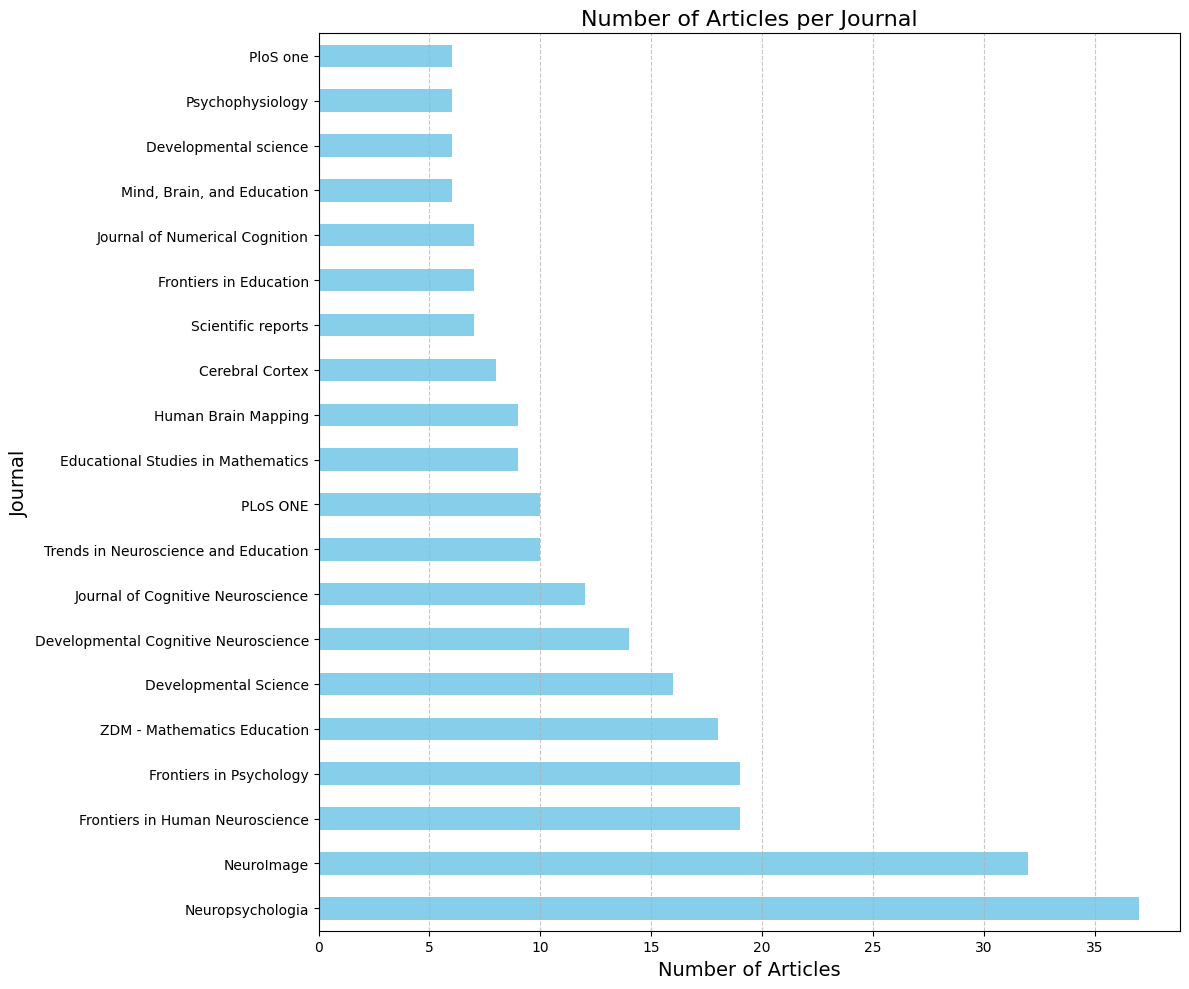

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'covidence' is your DataFrame
# Count the number of articles published in each journal
articles_per_journal = covidence['Journal'].value_counts()

# Filter out journals with only one article
filtered_articles_per_journal = articles_per_journal[articles_per_journal > 1]

# Select the top 50 journals
top_50_journals = filtered_articles_per_journal.head(20)

# Print the filtered counts for each journal
print(top_50_journals)

# Plot the data as a horizontal bar plot
plt.figure(figsize=(12, 10))  # Adjust the figure size
top_50_journals.plot(kind='barh', color='skyblue')
plt.title('Number of Articles per Journal', fontsize=16)
plt.xlabel('Number of Articles', fontsize=14)
plt.ylabel('Journal', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





                  Author  Count
470                Vinod     26
111                 Wang     15
47                Daniel     15
196                Zhang     15
228                 Bert     14
481            Stanislas     10
377       Hans-Christoph     10
1278             Grabner      9
628              Michael      8
851             Anderson      8
544        Bert; Grabner      8
418              John R.      8
244                Klein      7
375             Kaufmann      7
966                  Liu      7
176               Xinlin      7
632             De Smedt      7
629               Ansari      7
142   Suֳ¡rez-Pellicioni      7
830              Haixian      6


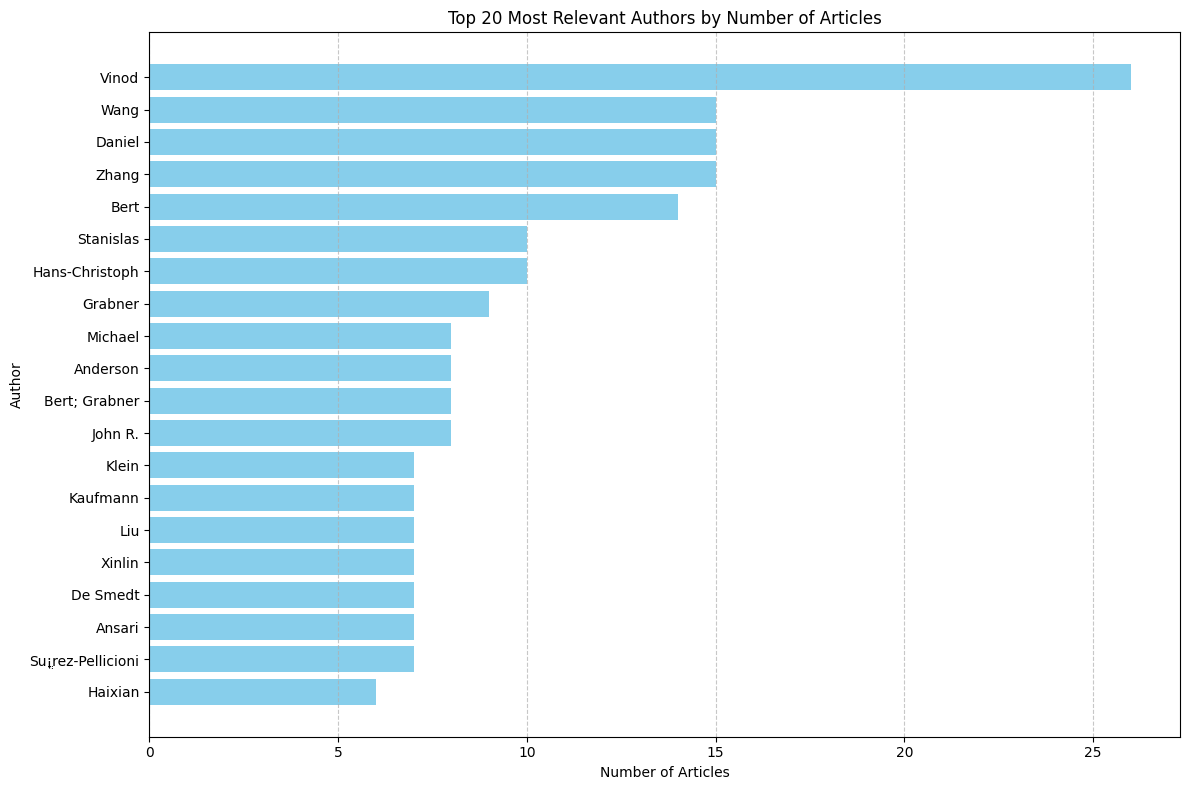

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools

# Sample data creation for demonstration
# Please replace this with your actual DataFrame
# covidence = pd.read_csv('path_to_your_file.csv')

# Assuming 'covidence' is your DataFrame and it has an 'Authors' column
# where each cell contains a list of authors for that article.
# If the 'Authors' column is a string, split it into lists.
# Example format: "Author1, Author2, Author3"

# Ensure the 'Authors' column is split into lists
covidence['Authors'] = covidence['Authors'].str.split(',')

# Flatten the list of lists into a single list of authors
all_authors = list(itertools.chain.from_iterable(covidence['Authors'].dropna()))

# Clean up author names (e.g., removing leading/trailing spaces)
all_authors = [author.strip() for author in all_authors]

# Count the occurrences of each author
author_counts = Counter(all_authors)

# Convert to a DataFrame for easier manipulation and visualization
author_counts_df = pd.DataFrame(author_counts.items(), columns=['Author', 'Count'])

# Sort by count in descending order and select the top authors
top_authors = author_counts_df.sort_values(by='Count', ascending=False).head(20)

# Print the top authors
print(top_authors)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(top_authors['Author'], top_authors['Count'], color='skyblue')
plt.title('Top 20 Most Relevant Authors by Number of Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Author')
plt.gca().invert_yaxis()  # Invert y-axis to have the top author at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

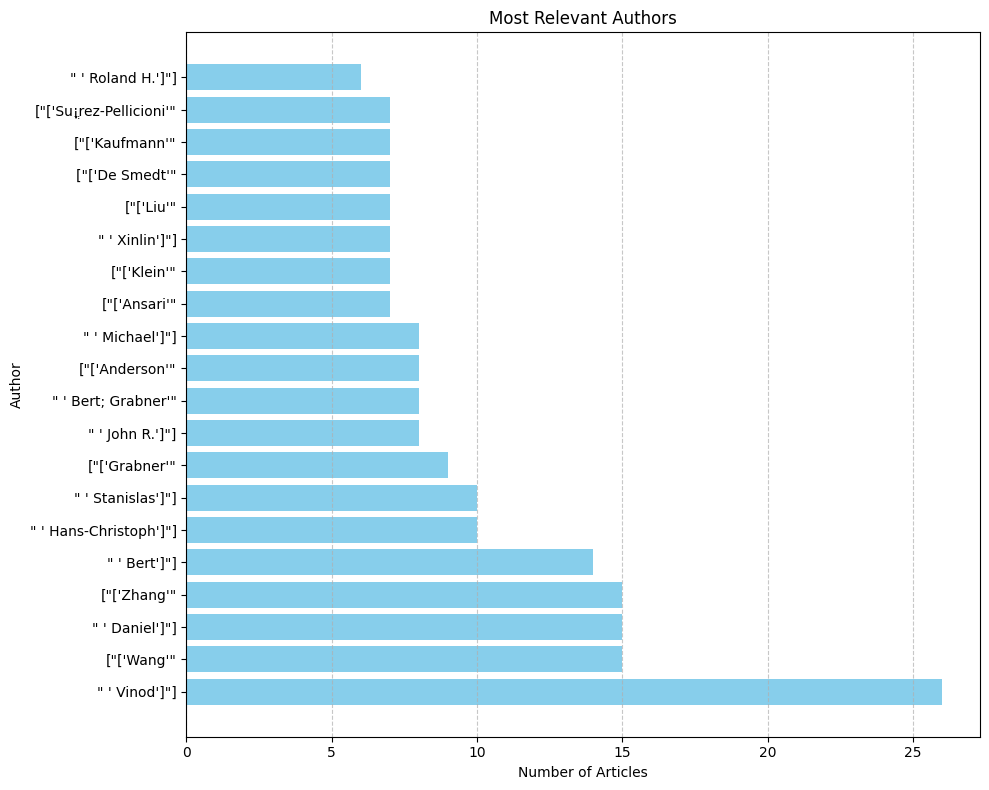

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools

# Sample data creation for demonstration
# Please replace this with your actual DataFrame
# covidence = pd.read_csv('path_to_your_file.csv')

# Assuming 'covidence' is your DataFrame and it has an 'Authors' column
# Ensure the 'Authors' column is converted to strings
covidence['Authors'] = covidence['Authors'].astype(str)

# Split the strings into lists of authors
covidence['Authors'] = covidence['Authors'].str.split(',')

# Flatten the list of lists into a single list of authors
all_authors = list(itertools.chain.from_iterable(covidence['Authors'].dropna()))

# Clean up author names (e.g., removing leading/trailing spaces)
all_authors = [author.strip() for author in all_authors]

# Count the occurrences of each author
author_counts = Counter(all_authors)

# Convert to a DataFrame for easier manipulation and visualization
author_counts_df = pd.DataFrame(author_counts.items(), columns=['Author', 'Count'])

# Sort by count in descending order and select the top authors
top_authors = author_counts_df.sort_values(by='Count', ascending=False).head(20)

# Plot the data as a horizontal bar plot with adjusted figure size
plt.figure(figsize=(10, 8))  # Adjust figure size
plt.barh(top_authors['Author'], top_authors['Count'], color='skyblue')
plt.title('Most Relevant Authors')
plt.xlabel('Number of Articles')
plt.ylabel('Author')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
